In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, Label

BASE_PATH = "../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"predict_example_01/"
os.system("mkdir -p " + OUTPUT_PATH)


# Load the dataset
(train_dataset, test_dataset), metadata = tfds.load(
    'cats_vs_dogs',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    split=['train[:80%]', 'train[99%:]'],
    with_info=True,
    as_supervised=True
)

print(f"Number of test samples: {test_dataset.cardinality()}")

2025-07-11 21:51:37.118628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-11 21:51:37.118664: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-11 21:51:37.119398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-11 21:51:37.124428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of test samples: 233


2025-07-11 21:51:39.253112: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-11 21:51:39.253395: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-11 21:51:39.313030: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

(-0.5, 331.5, 399.5, -0.5)

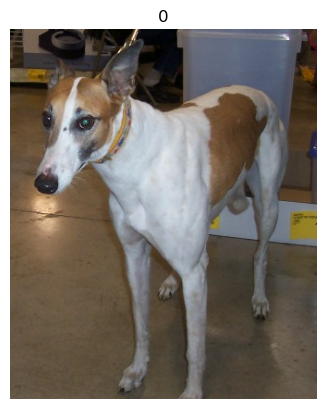

In [3]:
images=[]
for i, (image, label) in enumerate(test_dataset.take(-1)):
    images.append(image)

plt.imshow(images[2])
plt.title(int(label))
plt.axis("off")

In [4]:
import cv2



In [7]:
from ipywidgets import HBox, Label
import ipywidgets as widgets
import cv2


images=[]
for i, (image, label) in enumerate(test_dataset.take(-1)):
    images.append(image)


# print(images[2])
# print(images[2].as_numpy())

myimg=images[2].as_numpy()
# exit()

# _, PNG = cv2.imencode('.png', images[2])



# # Read an image file
# with open('puppy.jpg', 'rb') as f:
#     image_data = f.read()

# Create an Image widget
image_widget = widgets.Image(
    value=myimg,
    format='png',
    width=300,
    height=400
)

HBox([image_widget,Label('A too long description') ])

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'as_numpy'

In [ ]:
new_df=tfds.as_dataframe(test_dataset.take(4), metadata)
new_df

In [ ]:
new_df2= pd.DataFrame(index=range(4), columns=['A'])
new_df2

In [ ]:
compare = pd.concat([new_df, new_df2], axis=1)
compare